<a href="https://colab.research.google.com/github/shre2398/TensorflowForAI/blob/main/complex_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download datasets

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

# validation dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-04-21 06:51:36--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 108.177.15.128, 173.194.76.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  10.6MB/s    in 16s     

2021-04-21 06:51:52 (9.17 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-04-21 06:51:52--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 66.102.1.128, 142.250.13.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148

## Unzip the downloaded dataset and define directories

In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [3]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse34-4.png', 'horse11-7.png', 'horse36-3.png', 'horse08-5.png', 'horse48-9.png', 'horse45-9.png', 'horse39-5.png', 'horse18-1.png', 'horse13-3.png', 'horse46-7.png']
['human14-06.png', 'human15-14.png', 'human01-30.png', 'human11-11.png', 'human03-06.png', 'human11-03.png', 'human01-26.png', 'human02-12.png', 'human07-27.png', 'human09-25.png']
['horse3-440.png', 'horse1-224.png', 'horse4-503.png', 'horse2-441.png', 'horse4-302.png', 'horse4-014.png', 'horse1-298.png', 'horse4-000.png', 'horse3-055.png', 'horse5-060.png']
['valhuman05-01.png', 'valhuman04-23.png', 'valhuman05-11.png', 'valhuman04-17.png', 'valhuman04-11.png', 'valhuman01-00.png', 'valhuman01-07.png', 'valhuman03-04.png', 'valhuman05-18.png', 'valhuman03-20.png']


In [5]:
print('Total training horses images:', len(os.listdir(train_horse_dir)))
print('Total training humans images:', len(os.listdir(train_human_dir)))
print('Total validation horses images:', len(os.listdir(validation_horse_dir)))
print('Total validation humans images:', len(os.listdir(validation_human_dir)))

Total training horses images: 500
Total training humans images: 527
Total validation horses images: 128
Total validation humans images: 128


## Display a batch of images

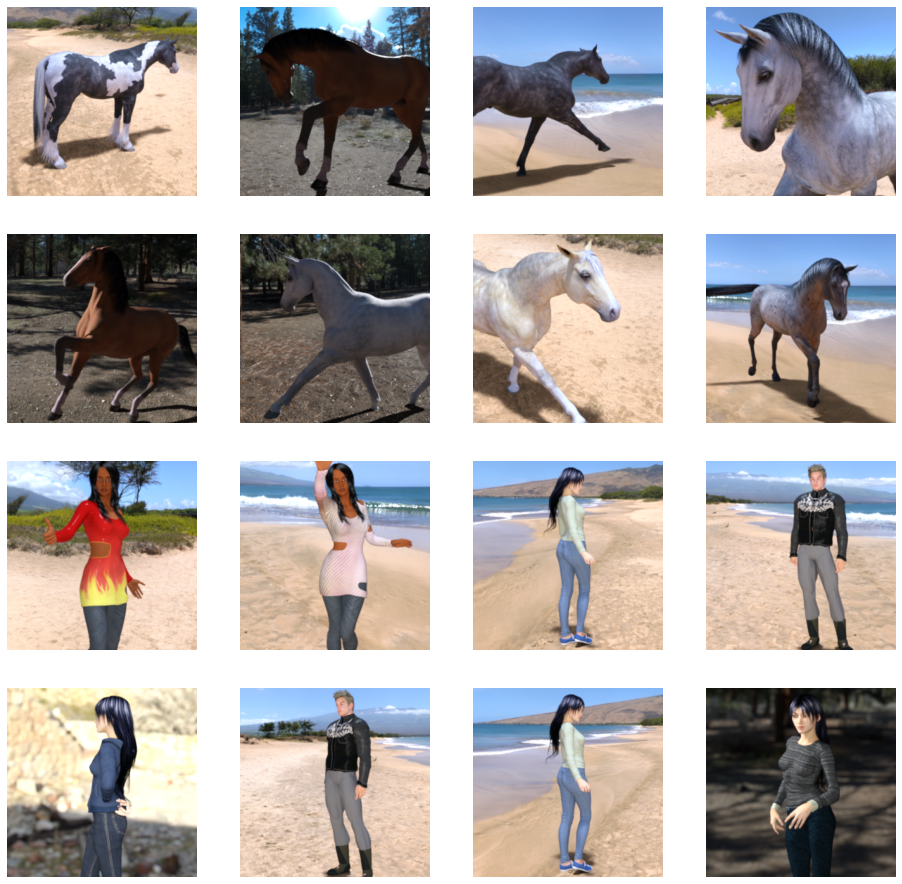

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# parameteres for 4x4 image
nrows = 4
ncols = 4

# index for interation
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_names[pic_index-8: pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8: pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building a small model from scratch

In [7]:
import tensorflow as tf

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3,), activation='relu', input_shape=(300, 300, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16, (3,3,), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16, (3,3,), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),    
  tf.keras.layers.Conv2D(16, (3,3,), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),    
  tf.keras.layers.Conv2D(16, (3,3,), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 16)        2

In [10]:
from tensorflow.keras.optimizers import RMSprop

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

## Data Preprocessing

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Rescale images by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow images in batches of 128 using data generator
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size=(300, 300), # resize all images to 300x300
    batch_size=128,
    class_mode='binary' # since we use binary_crossentropy, we need binary labels
)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human',
    target_size=(300, 300), # resize all images to 300x300
    batch_size=32,
    class_mode='binary' # since we use binary_crossentropy, we need binary labels
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Training

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data = validation_generator,
    validation_steps = 8
)

Epoch 1/15
8/8 [==============================] - 40s 1s/step - loss: 0.7223 - accuracy: 0.5284 - val_loss: 0.6096 - val_accuracy: 0.7734
Epoch 2/15
8/8 [==============================] - 8s 999ms/step - loss: 0.6190 - accuracy: 0.6103 - val_loss: 0.9571 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 0.6751 - accuracy: 0.7333 - val_loss: 0.4999 - val_accuracy: 0.7539
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.4207 - accuracy: 0.8172 - val_loss: 0.8394 - val_accuracy: 0.7812
Epoch 5/15
8/8 [==============================] - 8s 1s/step - loss: 0.6270 - accuracy: 0.8946 - val_loss: 0.3352 - val_accuracy: 0.8711
Epoch 6/15
8/8 [==============================] - 8s 1s/step - loss: 0.2531 - accuracy: 0.9483 - val_loss: 0.3175 - val_accuracy: 0.8945
Epoch 7/15
8/8 [==============================] - 8s 1s/step - loss: 0.1751 - accuracy: 0.9469 - val_loss: 0.5668 - val_accuracy: 0.8672
Epoch 8/15
8/8 [=====================

## Running the model

In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=0)
  print(classes[0])
  if(classes[0] > 0.5):
    print(fn + " is a human")
  else:
    print(fn + " is a horse")  

Saving horses-2904536__340.webp to horses-2904536__340.webp
[0.]
horses-2904536__340.webp is a horse
